# **DS514/515 Final Project**

# หัวข้อ : **Adidas US Sales Analysis**

**สมาชิก:**
<br>1) นางสาวฐิติยาพร โพธิ์งาม (ID: 68199160264)
<br>2) นางสาวศรุตา หีมมิหน๊ะ (ID : 68199160300)
<br>3) นางสาวสุธิดา จังหวัด (ID : 68199160304)
<br><br>
**Dataset:** Adidas US Sales Datasets <br>
**link Source:** https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset

# Adidas US Sales Datasets

จาก dataset มีจุดประสงค์หลักคือต้องการรู้ว่า "ปัจจัยใดมีผลต่อยอดขายรวมมากที่สุด" และ

-----

**จุดประสงค์จากการวิเคราะห์**
* เพื่อทำความเข้าใจปัจจัยที่ส่งผลต่อยอดขายรวม (Total Sales Drivers)
* เพื่อประเมินประสิทธิภาพของโมเดลที่สร้างขึ้น (Model Performance Evaluation)
* เพื่อระบุแนวโน้มเชิงธุรกิจและ Insight สำคัญ


---

**Modelที่ใช้การทำนายในครั้งนี้**

ใช้ Ridge Regression ในการทำนาย เนื่องจาก
* ให้การทำนายที่เสถียรกว่า Linear Regression เพราะไม่ให้ Coefficient ใด่โดดเด่นจนเกินไป
* ป้องกันการ overfitting
* เหมาะเมื่อมีฟีเจอร์ One-Hot
* ตีความ Coefficients ได้ง่ายกว่า Lasso

---
**Hypothesis**


H0 (Null Hypothesis): แต่ละช่องทางขายไม่มีผลแตกต่างกันต่อ Total Sales

* H0: การขาย In-store, Online, Outlet ให้ยอดขายรวมเท่ากันโดยไม่มีความแตกต่างอย่างมีนัยสำคัญ

H1 (Alternative Hypothesis): ช่องทางขายมีผลแตกต่างกันต่อ Total Sales

* H1: อย่างน้อยหนึ่งช่องทางขายมีผลต่อ Total Sales แตกต่างจากช่องทางอื่น

# 1.Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Read Data

In [ ]:
#เชื่อมต่อกับ google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
StrPath1 = '/content/drive/MyDrive/Colab Notebooks/Adidas US Sales Datasets.xlsx'

In [ ]:
df=pd.read_excel(StrPath1)
df.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.0,0.30,In-store


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 980.0+ KB


In [ ]:
df.isnull().sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


# 3.EDA

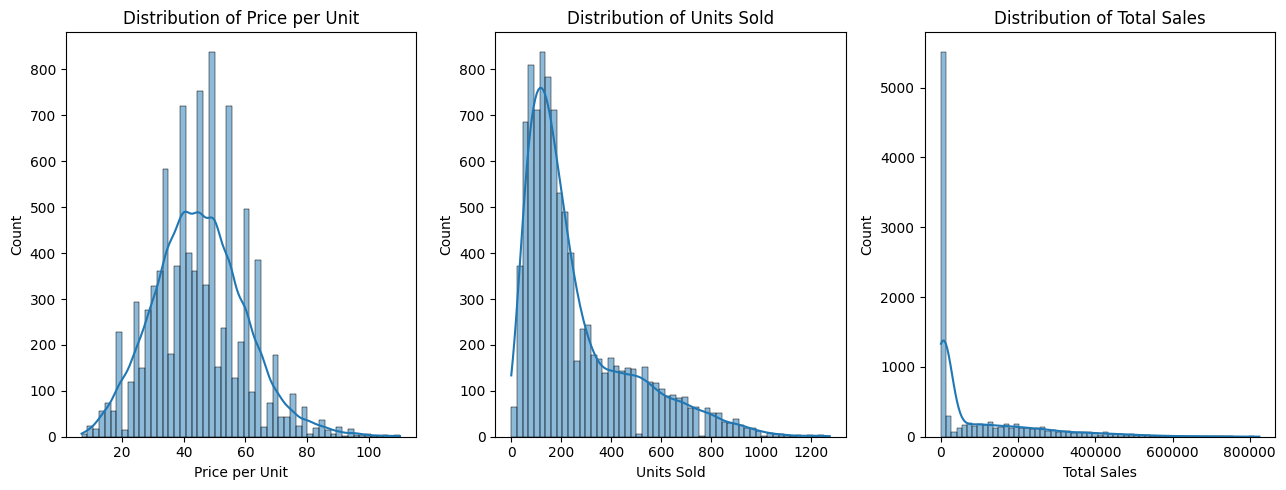

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#วิเคราะห์การกระจายของยอดขาย
numeric_cols = ["Price per Unit", "Units Sold", "Total Sales"]

plt.figure(figsize=(13, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


**Insight สิ่งที่ได้จากกราฟ**
1. Units Sold อาจมี fat tail (ยอดขายสูงบางจุด)ข้อมูลยอดขายจริงมักมีสินค้าที่ขายดีมากบางจุด
2. Price per Unit มีการกระจุกอยู่ที่ราคาเฉพาะ เพราะเป็นสินค้าแบรนด์เดียวกัน  ราคามักไม่กระจายมาก
3. Total Sales อาจ skew ไปทางขวา แสดงว่า “สินค้าบางอันขายดีมาก”

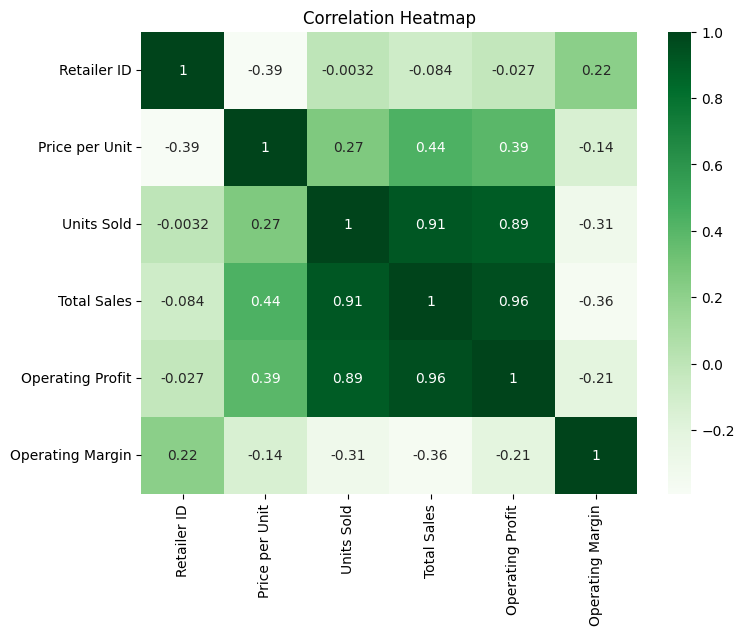

In [ ]:
# วิเคราะห์ Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')
plt.title("Correlation Heatmap")
plt.show()

**Insight สิ่งที่ได้จากกราฟ**
1. Total Sales มีความสัมพันธ์สูงมากกับ Units Sold (0.91)  
 หมายความว่าปริมาณขายคือ driver สำคัญที่สุด
2. จากความสัมพันธ์ของ Price per Unit กับ Total Sales ทำให้เห็นว่า ราคาแพงขึ้นไม่ได้แปลว่ายอดขายรวมสูงขึ้นเสมอ ต้องขึ้นกับ Units Sold เป็นปัจจัยหลัก
3. Total Sales มีความสัมพันธ์สูงกับ Operating Profit



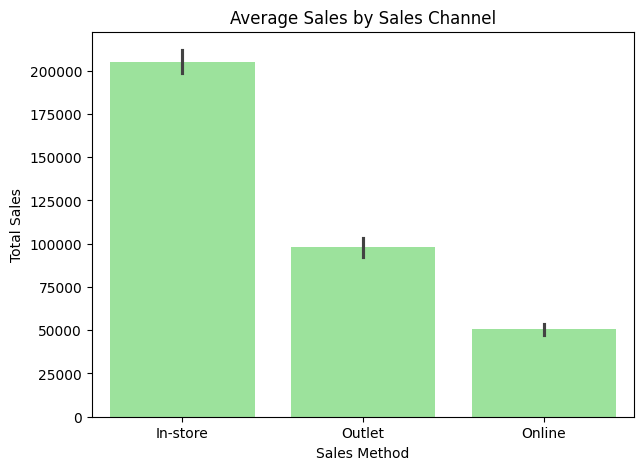

In [ ]:
# ยอดขายตามช่องทางการขาย
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Sales Method", y="Total Sales", estimator="mean", color='lightgreen')
plt.title("Average Sales by Sales Channel")
plt.show()

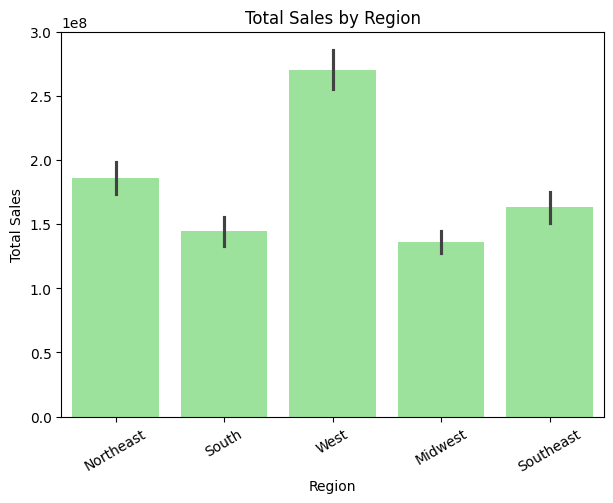

In [ ]:
# ยอดขายตาม Region
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Region", y="Total Sales", estimator="sum", color='lightgreen')
plt.title("Total Sales by Region")
plt.xticks(rotation=30)
plt.show()

# 4.Preprocessing Setup

กำหนด
* Target: Total Sales
* Features: 'Price per Unit', 'Units Sold', 'Sales Method'

ใช้ Onehot เพื่อลดความเสี่ยงที่ Model จะเข้าใจผิดระหว่างข้อมูลประเภท Category และข้อมูลประเภท numeric

โดยกำหนดว่า
* Column ไหนเป็นตัวเลข = ไม่ต้องเข้ารหัส One-Hot
* Column ไหนเป็นตัวหนังสือ = ต้องเข้ารหัส One-Hot

In [ ]:
from sklearn.preprocessing import OneHotEncoder

num_features = ['Price per Unit', 'Units Sold']
cat_features = ['Sales Method']
target_col = 'Total Sale'

In [ ]:
X = df[num_features + cat_features]
y = df['Total Sales']

Train-Test Split
* 80% สำหรับ train
* 20% สำหรับ test
* random_state=42 ทำให้ผลลัพธ์เหมือนเดิมทุกครั้ง

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

X_train : (7718, 3)
X_test : (1930, 3)
y_train : (7718,)
y_test : (1930,)


# 5.Build Model

# Ridge with Polynomial (numeric-only) + OneHot (categorical)

ใช้ Polynomial เพื่อใส่ความสัมพันธ์เชิงกำลัง
*   เพื่อให้โมเดลจับความสัมพันธ์โค้ง (non-linear)
*   เพราะ Total Sales อาจไม่ได้สัมพันธ์เชิงเส้นกับ Units Sold หรือ Price



เตรียมข้อมูลกตัวเลขก่อนเอาไปเข้า Rigde Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

num_pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler())
])
#แปลงฟีเจอร์ตัวเลขให้เหมาะกับ Ridge Regression
#สร้างฟีเจอร์กำลังสอง/กำลังสาม/interaction (PolynomialFeatures)
#ทำให้สเกลของฟีเจอร์อยู่ในช่วงใกล้กัน (StandardScaler)

สร้าง sub-pipeline สำหรับคอลัมน์ประเภท categorical

In [ ]:
# Categorical pipeline: OneHot (drop first to reduce multicollinearity)
#Pipeline นี้ทำหน้าที่ แปลง Category เป็นเลข โดยใช้ One-Hot Encoding เป็น 0 กับ 1
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore')) # Ignor เพื่อป้องกัน Error เวลาเจอ Category ใหม่
])


ColumnTransformer
<BR>
คอลัมน์ไหนให้แปลงแบบ Numeric Pipeline
คอลัมน์ไหนให้แปลงแบบ Categorical Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('num', num_pipeline, ['Price per Unit', 'Units Sold']),
    ('cat', cat_pipeline, ['Sales Method'])
], remainder='drop')

In [ ]:
model_pipeline = Pipeline([
    ('preprocess', preprocessor), #แปลงfeature
    ('ridge', Ridge(max_iter=10000, random_state=42))
])

กำหนด Parameter
<br>
ปรับ hyperparameter

In [ ]:
param_grid = {
    'preprocess__num__poly__degree': [1, 2, 3],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

ลองหลาย ๆ พารามิเตอร์ แล้วหา combination ที่ให้โมเดลดีที่สุด โดยทดสอบแบบ Cross Validation (CV)

GridSearch
* แบ่ง train data ออกเป็น 5 folds
* ลองรัน Ridge แต่ละ alpha
* เลือก alpha ที่ดีที่สุด

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    model_pipeline,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)


fit data

In [ ]:
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best CV (neg MSE):",  grid.best_score_) #ค่าเฉลี่ยของ neg mse 5 folds โดยแสดงค่าของพารามิเตอร์ที่ดีที่สุด

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'preprocess__num__poly__degree': 3, 'ridge__alpha': 0.1}
Best CV (neg MSE): -740670472.8186452


Polynomial degree = 3 คือดีที่สุด แสดงว่าความสัมพันธ์ระหว่าง Price / Units Sold / Sales Method กับ Total Sales ไม่ใช่เส้นตรง แต่มีความ “โค้ง” และ “interaction” เยอะ
<br>
Ridge alpha = 0.1 คือค่าที่ควบคุมความซับซ้อนของโมเดลได้พอดี

ดูค่า RMSE


In [ ]:
neg_mse = grid.best_score_
rmse = (-neg_mse)**0.5
print("CV RMSE:", rmse)


CV RMSE: 27215.26176281693


# 6.Evaluate Best Model

เปรียบเทียบ Train Test เพื่อตรวจจับ Overfit

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R2: {train_r2:.4f} | Test R2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f} | Test RMSE: {test_rmse:.4f}")

Train R2: 0.9634 | Test R2: 0.9645
Train RMSE: 27099.8988 | Test RMSE: 26926.3007


จากการเปรียบเทียบพบว่าค่า R sqare ชุด Train Test ใกล้เคียงกัน แปลว่า model generalize

และค่า RMSE ชุด Train Test ใกล้เคียงกัน แปลว่า model ทำนายข้อมูลได้ดี

# 7.Coefficients

In [ ]:
import pandas as pd

# ดึง preprocessor ออกมาจาก pipeline
pre = best_model.named_steps['preprocess']

# ดึงชื่อฟีเจอร์ฝั่ง numeric หลัง PolynomialFeatures
num_pipeline = pre.named_transformers_['num']
poly = num_pipeline.named_steps['poly']
numeric_feature_names = poly.get_feature_names_out(['Price per Unit', 'Units Sold'])

# ดึงชื่อฟีเจอร์ฝั่ง categorical หลัง OneHotEncoder
cat_pipeline = pre.named_transformers_['cat']
ohe = cat_pipeline.named_steps['onehot']
categorical_feature_names = ohe.get_feature_names_out(['Sales Method'])

# รวมชื่อฟีเจอร์ทั้งหมดตามลำดับใน matrix ที่ส่งเข้า Ridge
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# ดึง coefficients ของ Ridge
coefs = best_model.named_steps['ridge'].coef_

# สร้างตารางค่า coefficient
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefs
})

# เรียงลำดับจากผลกระทบมาก → น้อย (ใช้ absolute value)
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# แสดงผล
coef_df


,Feature,Coefficient,Abs_Coefficient
4,Units Sold^2,194439.640449,194439.640449
3,Price per Unit Units Sold,119483.845067,119483.845067
8,Units Sold^3,-93283.995154,93283.995154
1,Units Sold,-88891.423146,88891.423146
2,Price per Unit^2,63322.665449,63322.665449
5,Price per Unit^3,-51832.657591,51832.657591
6,Price per Unit^2 Units Sold,39920.226468,39920.226468
9,Sales Method_Online,-37360.860713,37360.860713
0,Price per Unit,-36726.314200,36726.314200
10,Sales Method_Outlet,-33667.369374,33667.369374


**Sale Method_Instore จะถูกใช้เป็น baseline  จึง ไม่ถูกสร้างเป็นคอลัมน์

สรุป Insight จาก Coefficients
1. ปัจจัยด้าน “ราคา” และ “จำนวนหน่วยขาย” ส่งผลบวกต่อรายได้ตามคาดการณ์


2. กลยุทธ์ช่องทางขายมีผลต่อรายได้
In-store สร้างรายได้สูงที่สุด
Online และ Outlet มียอดขายน้อยกว่าเมื่อเทียบกับ baseline

3. In-store เป็นช่องทางที่มีศักยภาพสร้าง Total Sales สูงที่สุด (แต่ไม่แสดงในตารางเพราะตอนตั้ง OneHotEncoder(drop=first))

# ผลสรุปจากการวิเคราะห์
1. Units Sold (ปริมาณขาย) เป็นปัจจัยหลักที่กำหนดยอดขายรวม
*   จากค่า Coefficient พบว่า Units Sold เป็นตัวแปรที่มีอิทธิพลสูงที่สุด ต่อรายได้
*   การเพิ่มจำนวนสินค้าที่ขายมีผลเพิ่มยอดขายรวม มากกว่า การปรับราคาเพียงอย่างเดียว
*   ชี้ให้เห็นว่าองค์กรควรโฟกัสที่ กลยุทธ์เพิ่มปริมาณขาย เช่น Promotion, Bundling, Cross-selling หรือการเพิ่มช่องทางกระจายสินค้า

<br>

2. Price per Unit (ราคาต่อหน่วย) ส่งผลต่อยอดขาย แต่เป็นปัจจัยรอง
*   ราคามีผลต่อรายได้โดยตรง แต่ความแรงของผลกระทบ น้อยกว่า Units Sold
*   การปรับราคาควรทำอย่างระมัดระวัง โดยคำนึงถึง Demand Elasticity (ความยืดหยุ่นของอุปสงค์)
*   สามารถนำไปสู่การทำ Price Optimization เพื่อหาจุดราคาที่ทำกำไรสูงสุดโดยไม่กระทบยอดขายจนเกินไป

<br>

3. Sales Method (ช่องทางการขาย) มีผลต่อรูปแบบพฤติกรรมซื้อ
 * "Sales Method" เป็นตัวแปรที่ช่วยเพิ่มความแม่นยำในการวิเคราะห์
 * หากช่องทาง Online มี Coefficient บวก ควรลงทุนใน Digital Marketing
 * หากช่องทาง In-store ทำยอดขายสูง ควรเพิ่มพื้นที่โชว์สินค้า หรือ Staff Training